In [2]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
# from keras import  layers
from keras.models import Sequential
from keras.layers import Dense, Input, ReLU
import matplotlib.pyplot as plt


In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [11]:
model = Sequential([
    Input(shape=(None, 784)),
    Dense(512, activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

hist = model.fit(train_images, train_labels, epochs=20, validation_split=0.2, batch_size=128)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, None, 512)         401920    
                                                                 
 dense_5 (Dense)             (None, None, 10)          5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.2902 - accuracy: 0.9175 - val_loss: 0.1542 - val_accuracy: 0.9567
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1219 - accuracy: 0.9645 - val_loss: 0.1146 - val_accuracy: 0.9667
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0805 - accuracy: 0.9769 - val_loss: 0.0890 - val_accuracy: 0.9741
Epoch 4/20
375/375

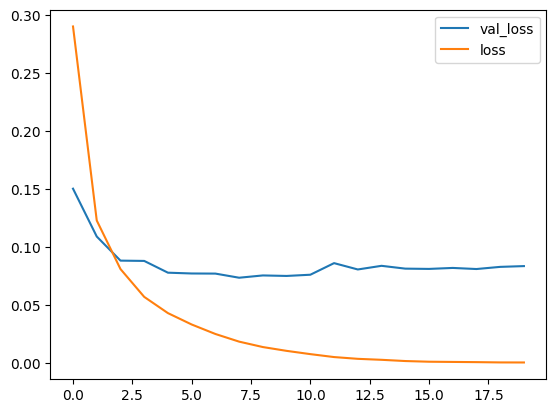

In [6]:
epochs = range(20)
plt.plot(epochs,hist.history['val_loss'])
plt.plot(epochs,hist.history['loss'])
plt.legend(['val_loss','loss'])


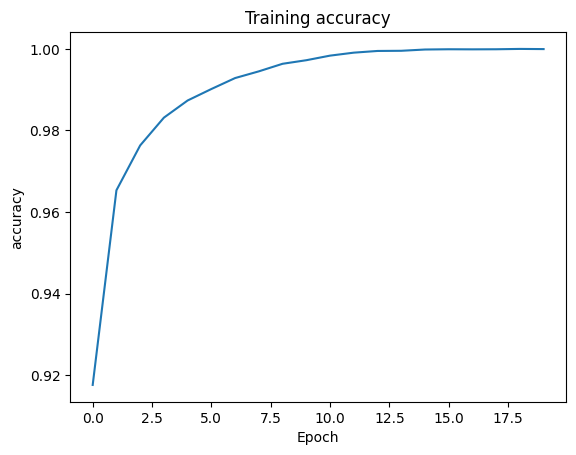

In [7]:
plt.plot(hist.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()